# Overview 

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

# You are expected to:

* Define the question, the metric for success, the context, experimental design taken.
* Read and explore the given dataset.
* Define the appropriateness of the available data to answer the given question.
* Find and deal with outliers, anomalies, and missing data within the dataset.
* Perform univariate, bivariate and multivariate analysis recording your observations.
* Performing regression analysis.
* Incorporate categorical independent variables into your models.
* Check for multicollinearity
* Provide a recommendation based on your analysis. 
* Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
*  Challenge your solution by providing insights on how you can make improvements in model improvement.

While performing your regression analysis, you will be required to perform modeling using the given regression techniques then evaluate their performance. You will be then required to provide your observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem. 

1. Multiple Linear Regression
2. Quantile Regression
3. Ridge Regression
4. Lasso Regression
5. Elastic Net Regression

**Below is the dataset glossary:**

* Id 
* price  - Price of the house
* bedrooms - Number of Bedrooms
* bathrooms - Number of Bathrooms
* sqft_living - Square feet area of living area
* sqft_lot  - Square feet area of parking Layout
* floors - Number of Floors
* waterfront - Whether waterfront is there or not
* view - Number of Views
* grade - Grades
* sqft_above
* sqft_basement - Square feet area off basement
* yr_built - Year the house is built
* yr_renovated - Year the house is renovated
* zipcode - zipcode os the house
* lat : Latitude of the house
* lon : Longitude of the house
* sqft_living15
* sqft_lot15

# Define the question, the metric for success, the context, experimental design taken.

**The question we pose is can we predict housing price given related values**

**The metric of success is the creation of a model that has an accuracy of more than 70% in predicting the housing price**

**The context is the data comes from Hass Consulting Company which has over 30 years of housing experince which means the data should have very few flaws** This is their website link : https://hassconsult.co.ke/real-estate/ 

**The *experimental design* is that the data will be explored, cleaned, visualized then finally analysed. The final data frame is what will be used to train the various supervised learning models. The model with the highest level of accuracy will be chosen as the final predictor model**

As always the first step is to gain an understanding of the data, we will take a look at it, visualise a few variables

In [1]:
#Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#lets load up our csv file
data = pd.read_csv('/content/drive/MyDrive/Week 7/Independent Project Week 7 - house_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [3]:
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
#The data is complete without any null values. All of the columns are numeric continous variables. We will then check for duplicates
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

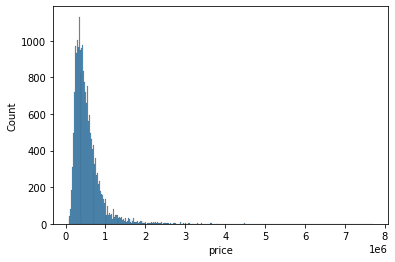

In [10]:
#exploration done. We will check the dispersal of data with a few graphs. First being prices
sns.histplot(x=data['price'])
#Most of the houses cost below 100,000 

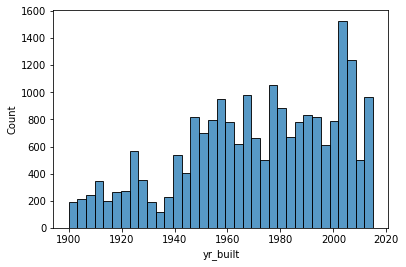

In [9]:
#next is the age of the houses
sns.histplot(x=data['yr_built'])
#We can also see that the houses in the dataset are varied in age from 1900s to 2015

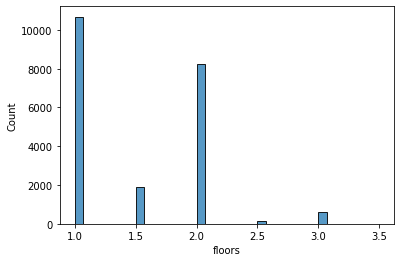

In [14]:
#next is the number of floors
sns.histplot(x=data['floors'])
#most houses just have one floor

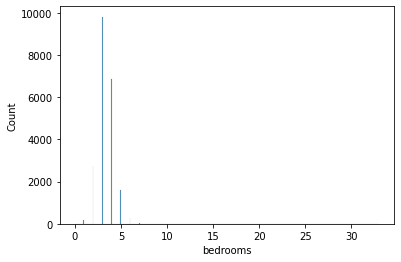

In [15]:
#finally the number of bedrooms
sns.histplot(x=data['bedrooms'])
#most houses have less than 5 rooms, except that unit with 33 rooms

# The next step is some bivariate analysis

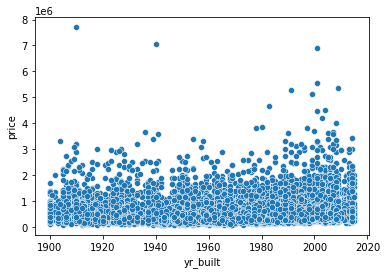

In [26]:
#lets start of with age and price
sns.scatterplot(x=data['yr_built'], y=data['price'])

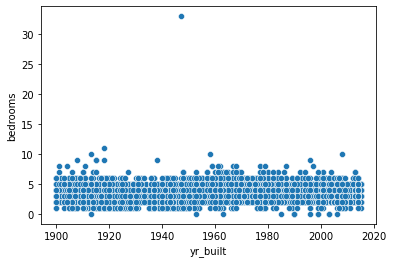

In [22]:
#Next is the age and number of rooms
sns.scatterplot(x=data['yr_built'], y= data['bedrooms'])

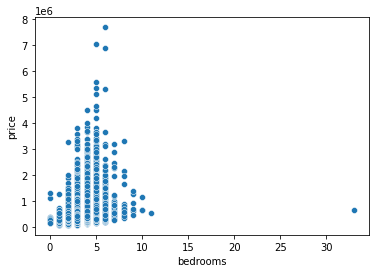

In [25]:
#Next is the price and number of bedrooms
sns.scatterplot(x=data['bedrooms'], y=data['price'])

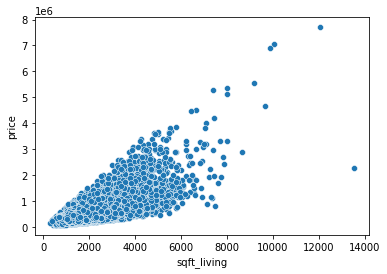

In [27]:
#Finnally is the living size and price
sns.scatterplot(x=data['sqft_living'],y=data['price'])

We saw some interesting visual, lets see how things are correlated


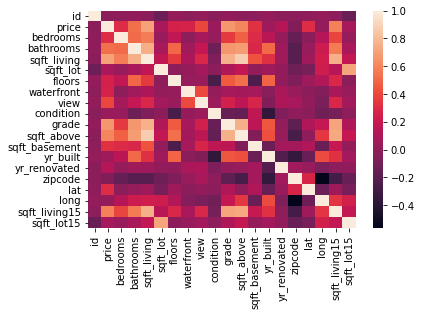

In [32]:
sns.heatmap(data.corr())
#lots of correlations from such a bright heat map

In [33]:
#The correlation table
cor = data.corr()
cor

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016797,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016797,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.001286,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [ ]:
#Next step is to check the Variance Inflation factoe. 
#This is a measure of how much the variance of a regression 
#coefficient in your model increases if your independent variables are correlated. 
# If no independent variables are correlated, you'll expect the VIF for each to be 1.

In [34]:
pd.DataFrame(np.linalg.inv(cor.values), index = cor.index, columns=cor.columns)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.028542,0.033760,0.002267,-0.005352,9.352615e-03,0.077219,-0.011600,0.002765,-0.037849,0.022078,-0.048373,1.013007e-02,-1.105818e-02,0.023615,0.017859,0.000315,0.007458,-0.072914,0.009239,0.105511
price,0.033760,3.331694,0.301926,-0.287621,-1.054597e+00,-0.045685,-0.033158,-0.457218,-0.369007,-0.155106,-1.024505,-4.057762e-01,-9.219750e-02,0.699138,-0.071608,0.282609,-0.757054,0.272064,-0.134388,0.098140
bedrooms,0.002267,0.301926,1.679425,-0.487234,-2.885593e-01,0.045161,0.046698,0.021795,0.080697,-0.064841,0.214235,-7.382444e-01,-3.996039e-01,0.197843,0.038950,0.105724,-0.017829,0.042108,0.013026,0.094213
bathrooms,-0.005352,-0.287621,-0.487234,3.375628,-4.997231e+00,-0.020368,-0.672186,0.049214,-0.009708,-0.123686,-0.179471,3.349567e+00,1.380899e+00,-0.996174,-0.253644,0.017405,0.024363,0.030747,0.103709,0.062751
sqft_living,0.009407,-1.051912,-0.288970,-4.979390,-3.387473e+13,-0.106325,0.529050,0.597701,-0.480168,-0.315408,-0.468463,3.054236e+13,1.632343e+13,1.446295,0.088357,-0.235350,0.263025,-0.212158,-0.932642,-0.214794
sqft_lot,0.077219,-0.045685,0.045161,-0.020368,-1.081761e-01,2.109017,0.044866,0.034139,-0.056515,0.034475,-0.042674,-8.089812e-02,1.801494e-02,0.090425,0.023829,-0.006678,0.064889,-0.142610,0.166587,-1.452768
floors,-0.011600,-0.033158,0.046698,-0.672186,5.331753e-01,0.044866,2.012361,-0.000812,-0.036580,0.090957,-0.220239,-9.724455e-01,3.652826e-01,-0.488619,-0.080094,-0.173551,-0.120268,0.162189,0.273838,0.070537
waterfront,0.002765,-0.457218,0.021795,0.049214,5.982500e-01,0.034139,-0.000812,1.266565,-0.442151,0.008786,0.189562,-4.644390e-01,-2.090603e-01,-0.116876,-0.055442,-0.016250,0.113898,-0.010443,0.072970,-0.031186
view,-0.037849,-0.369007,0.080697,-0.009708,-4.803610e-01,-0.056515,-0.036580,-0.442151,1.477161,-0.005080,-0.070505,6.221751e-01,4.115834e-02,0.073637,-0.032922,-0.171895,0.201833,0.043886,-0.311082,-0.021830
condition,0.022078,-0.155106,-0.064841,-0.123686,-3.148673e-01,0.034475,0.090957,0.008786,-0.005080,1.257240,-0.007632,4.035994e-01,8.203756e-02,0.529381,0.210433,0.148053,0.099266,-0.021435,0.082361,-0.030419


In [ ]:
#There is no value that is greater than 5 so we will not drop any collumns

The part we have all been waiting for 
# Modeling

We will begin with a regression model

# Multiple Linear Regression

We know the price is the dependent variable(Y)

In [35]:
#Importing de libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [36]:
data.head(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [38]:
X = data.drop(['price','id'], axis = 1).values
y = data['price'].values

In [42]:
X.shape

(21613, 18)

In [41]:
y.shape

(21613,)

In [43]:
#Creating train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=591)

In [44]:
# finding optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [45]:
# assessing the accuraccy of the model
y_pred = regressor.predict(X_test)

In [46]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 127568.64209766286
Mean Squared Error: 43249543360.384445
Root Mean Squared Error: 207965.24555892614


In [50]:
#Finding the redisual
residuals = np.subtract(y_pred,y_test)
residuals.mean()
#This is a really high value

-4205.411900713665

In [51]:
pd.DataFrame(residuals).describe()

,0
count,6.484000e+03
mean,-4.205412e+03
std,2.079388e+05
min,-3.243902e+06
25%,-7.724435e+04
50%,9.389091e+03
75%,9.750402e+04
max,1.024824e+06


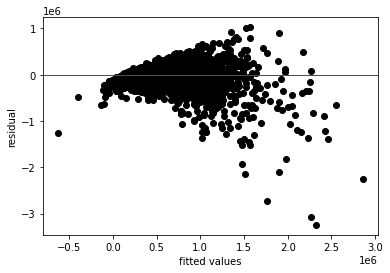

In [53]:
#Its best to graph this to get a better understanding
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

This doesnt look so bad,  we have a few outliers. However we can see there us a partern where some values seem to skew to the bottom right corner


Lets perform a bartletts test

In [57]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
critical_value

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!
